In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
from zipfile import ZipFile
import os

zip_file_path = '/content/drive/MyDrive/Fashion Recommendation Project/women-fashion.zip'

extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [25]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['strapless red midi dress with a mermaid silhouette.jpg',
  'long, elegant blue dress with an off-the-shoulder design with sheer sleeves.jpg',
  'fitted, ruched dress with a sweetheart neckline and long mesh sleeves.jpg',
  'Anarkali suit with a modern twist.jpg',
  'flowing green off-shoulder dress.jpg',
  'short, white, sleeveless dress with thin straps.jpg',
  'black top with spaghetti straps and a black skirt adorned with a fringe detail at the hem.jpg',
  'vibrant blue and a neutral tone adorned with colorful floral patterns.jpg',
  'yellow, intricately designed Anarkali suit.jpeg',
  'green dress with a floral pattern, paired with matching green trousers.jpg'],
 97)

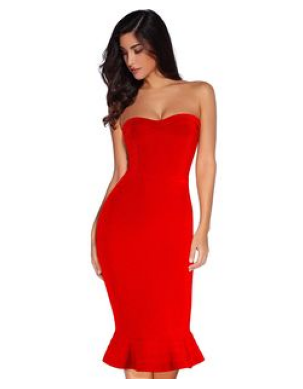

In [28]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

In [29]:
import glob

# directory path containing your images
image_directory = '/content/women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['/content/women_fashion/women fashion/strapless red midi dress with a mermaid silhouette.jpg', '/content/women_fashion/women fashion/long, elegant blue dress with an off-the-shoulder design with sheer sleeves.jpg', '/content/women_fashion/women fashion/fitted, ruched dress with a sweetheart neckline and long mesh sleeves.jpg', '/content/women_fashion/women fashion/Anarkali suit with a modern twist.jpg', '/content/women_fashion/women fashion/flowing green off-shoulder dress.jpg', '/content/women_fashion/women fashion/short, white, sleeveless dress with thin straps.jpg', '/content/women_fashion/women fashion/black top with spaghetti straps and a black skirt adorned with a fringe detail at the hem.jpg', '/content/women_fashion/women fashion/vibrant blue and a neutral tone adorned with colorful floral patterns.jpg', '/content/women_fashion/women fashion/yellow, intricately designed Anarkali suit.jpeg', '/content/women_fashion/women fashion/green dress with a floral pattern, paired with ma

In [30]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step
1/1 ━━━━━━━━━━━━

In [31]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


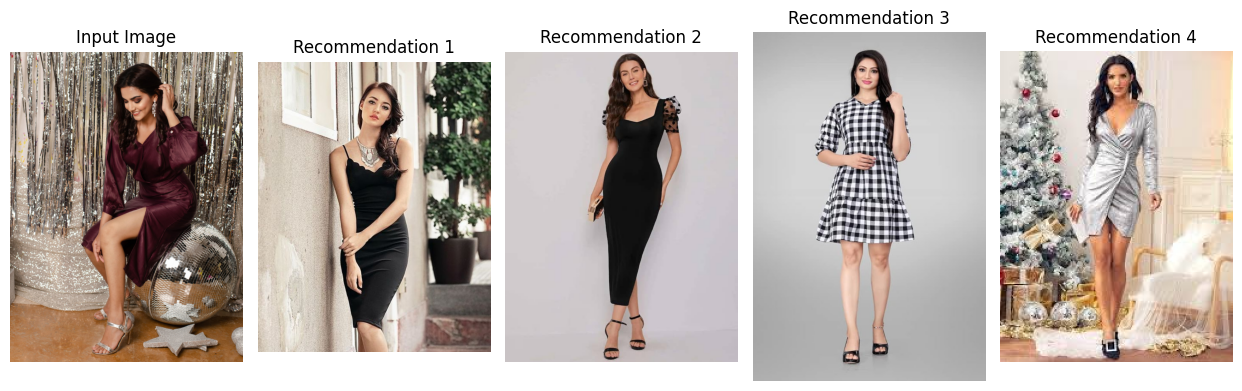

In [46]:
input_image_path = '/content/women_fashion/women fashion/deep burgundy, silky dress with long sleeves and a wrap-style front.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


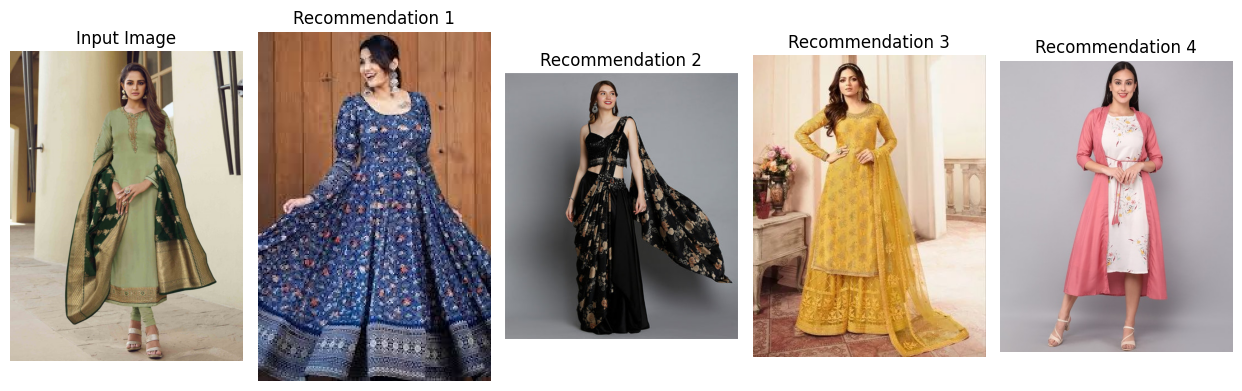

In [47]:
input_image_path = '/content/women_fashion/women fashion/anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step


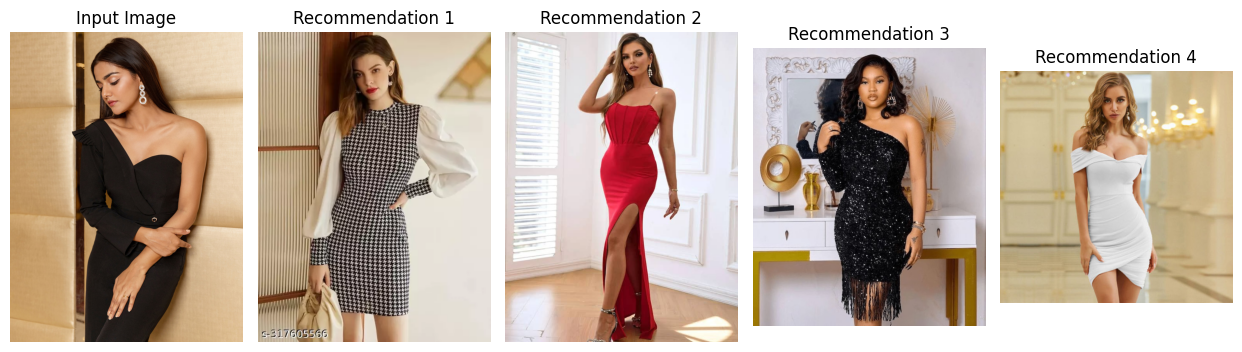

In [55]:
input_image_path = '/content/women_fashion/women fashion/sophisticated black dress with an asymmetrical design with one sleeve and a strapless neckline on the opposite side.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=5)